a

In [7]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_deform = "/home/ceballosarroyo.a/workspace/medical/cta-det2/outputs/deform_decoder_only/inference_final/predict.csv"
file_conv = "/home/ceballosarroyo.a/workspace/medical/cta-det2/outputs/dense_bn_64_infer/inference_hieu/predict.csv"

thr_conv = 0.7919299
thr_deform = 0.78260082
df_deform = csv.read_csv(file_deform)
df_deform = df_deform[df_deform["probability"] > thr_deform]
df_conv = csv.read_csv(file_conv)
df_conv = df_conv[df_conv["probability"] > thr_conv]

NameError: name 'csv' is not defined

In [11]:
len(df_deform), len(df_conv)

(169, 181)

In [10]:
columns_mean = ["d", "h", "w"]
columns_std = ["d", "h", "w"]

df_deform_mean = df_deform[columns_mean].mean()
df_deform_std = df_deform[columns_std].std()

df_conv_mean = df_conv[columns_mean].mean()
df_conv_std = df_conv[columns_std].std()

print("Deformable means")
print(df_deform_mean)
print("\nDeformable Stdevs")
print(df_deform_std)
print("\n----------------\n")
print("Conv means")
print(df_conv_mean)
print("\nConv Stdevs")
print(df_conv_std)

Deformable means
d    13.860722
h    16.032110
w    15.944431
dtype: float64

Deformable Stdevs
d    4.636095
h    4.751003
w    4.354259
dtype: float64

----------------

Conv means
d    12.837545
h    15.380343
w    15.433194
dtype: float64

Conv Stdevs
d    5.073795
h    6.077841
w    5.454137
dtype: float64


In [4]:
df_deform.columns

Index(['seriesuid', 'probability', 'coordZ', 'coordY', 'coordX', 'd', 'h',
       'w'],
      dtype='object')

# Size stats

In [18]:
path_base = Path("../../labels")

df_hospital = pd.read_csv(path_base / "gt/hospital_crop_0.4.csv")
df_internal_test = pd.read_csv(path_base / "gt/internal_test_crop_0.4.csv")

df_internal_train = pd.read_csv(path_base / "gt/internal_train_crop_0.4.csv")
df_external = pd.read_csv(path_base / "gt/external_crop_0.4.csv")

In [19]:
hospital_dims = df_hospital[["w", "h", "d"]].values
internal_test_dims = df_internal_test[["w", "h", "d"]].values
external_dims = df_external[["w", "h", "d"]].values
internal_train_dims = df_internal_train[["w", "h", "d"]].values

Text(0.5, 0, "Aneurysm 'radius' in mm")

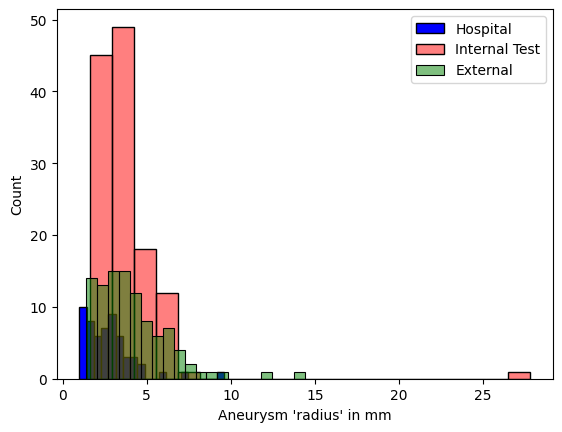

In [20]:
max_axis_hospital = hospital_dims.max(axis=1) / 2 * 0.4
max_axis_internal_test = internal_test_dims.max(axis=1) / 2 * 0.4
max_axis_external = external_dims.max(axis=1) / 2 * 0.4
max_axis_internal_train = internal_train_dims.max(axis=1) / 2 * 0.4

# plot all as histograms
#
sns.histplot(max_axis_hospital, bins=20, color="blue", alpha=1, label="Hospital")
sns.histplot(
    max_axis_internal_test, bins=20, color="red", alpha=0.5, label="Internal Test"
)
sns.histplot(max_axis_external, bins=20, color="green", alpha=0.5, label="External")

plt.legend()

plt.xlabel("Aneurysm 'radius' in mm")

<Axes: ylabel='Count'>

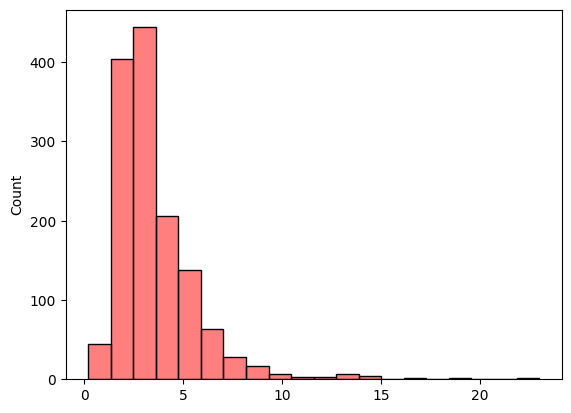

(0.0, 29.0)

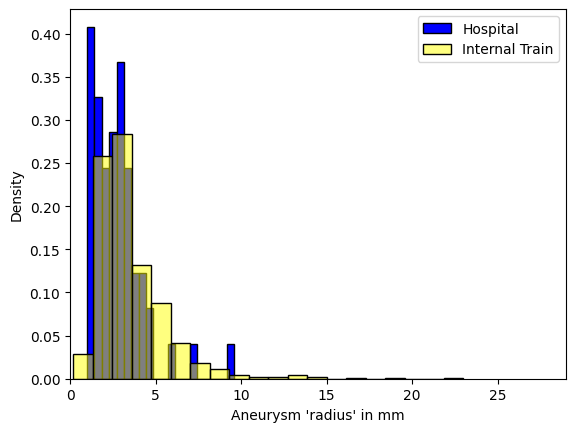

In [26]:
# plot all histograms but normalized

sns.histplot(
    max_axis_hospital, bins=20, color="blue", alpha=1, label="Hospital", stat="density"
)
sns.histplot(
    max_axis_internal_test,
    bins=20,
    color="red",
    alpha=0.5,
    label="Internal Test",
    stat="density",
)
sns.histplot(
    max_axis_external,
    bins=20,
    color="green",
    alpha=0.5,
    label="External",
    stat="density",
)

sns.histplot(
    max_axis_internal_train,
    bins=20,
    color="yellow",
    alpha=0.5,
    label="Internal Train",
    stat="density",
)

plt.legend()

plt.xlabel("Aneurysm 'radius' in mm")
plt.xlim(0, 29)